# Spectral and rhythmicity analyses

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from matplotlib import pyplot as plt
import copy

# Required for interactive plots in DataSpell
# import matplotlib
# matplotlib.use("nbagg")

### Load data

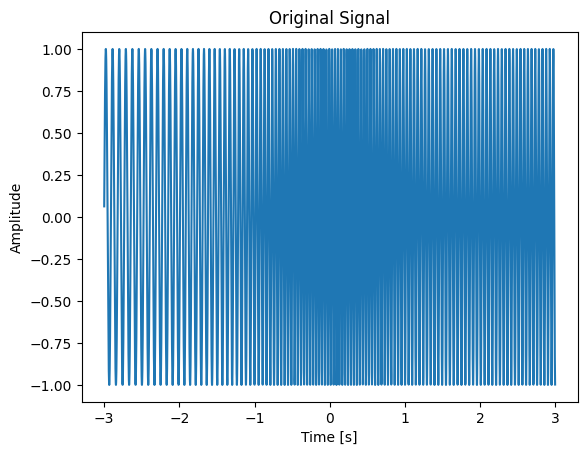

In [4]:
challengeData = sio.loadmat("Datasets/spectral_codeChallenge.mat")
signal = challengeData['signal'][0]
srate = challengeData['srate'][0]
time = challengeData['time'][0]

n = signal.size

# Preview original signal
plt.figure()
plt.title("Original Signal")
plt.plot(time, signal)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

### Getting the frequency components
First, we need a function to get the frequency domain data, that we can call repeatedly as we move through the signal.

In [89]:
# Apply the FFT on the data and return the frequency power
def ApplyFTT(data: np.ndarray) -> np.ndarray:

    # Window the data
    wData = data * np.hanning(data.size)

    # We only care about the real-valued FFT
    FreqPower = np.abs(np.fft.rfft(wData) / data.size)**2

    return FreqPower

### Generating the data
Now, apply the function to the signal, which results in a matrix with the changes in frequency over time.

In [90]:
# The window size in seconds
tDelta = 0.5

# The window size in number of samples
sDelta = int(tDelta * srate)

# Calculate where we start the bins
indices = range(0, n, sDelta)

freqOverTime = []
for indice in indices:

    # Ignore the last sample
    if indice + sDelta > n:
        break

    # Get a chunk of data
    chunk = signal[indice:indice + sDelta]

    # Apply the FFT
    powerSpectrum = ApplyFTT(chunk)

    # Append the power of this chunk to the global array
    freqOverTime.append(powerSpectrum)

# Adjust orientation to match the plot (switch columns and rows)
freqOverTime = np.transpose(freqOverTime)

### Plotting the data

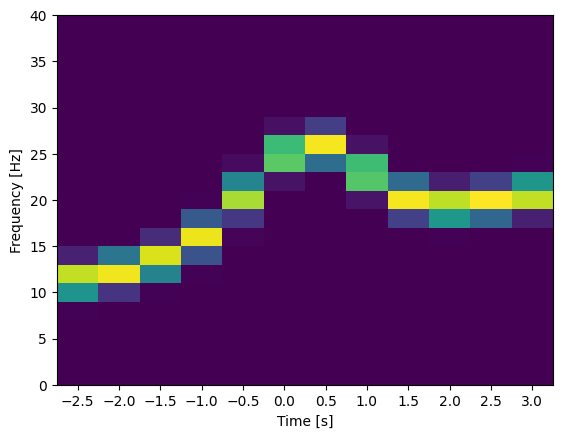

In [94]:
fig, ax = plt.subplots()

tIndices = np.arange(-2.5, 3 + tDelta, tDelta)
freqs = np.fft.rfftfreq(sDelta, 1/srate)

plt.pcolormesh(tIndices, freqs, freqOverTime)

plt.xticks(tIndices)
plt.ylim(0, 40)

plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")

plt.show()